In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("data/churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape


(7043, 21)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df["Churn"].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

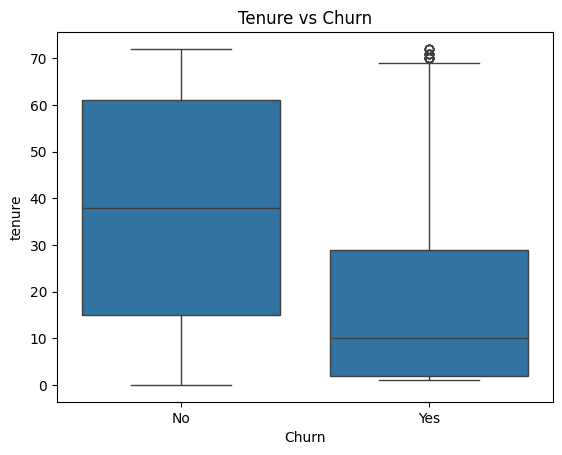

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


In [11]:
churn_rate = df["Churn"].value_counts(normalize=True) * 100
churn_rate


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

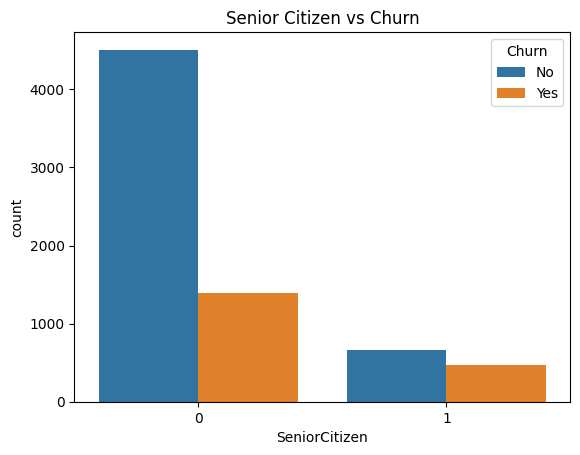

In [12]:
sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
plt.title("Senior Citizen vs Churn")
plt.show()


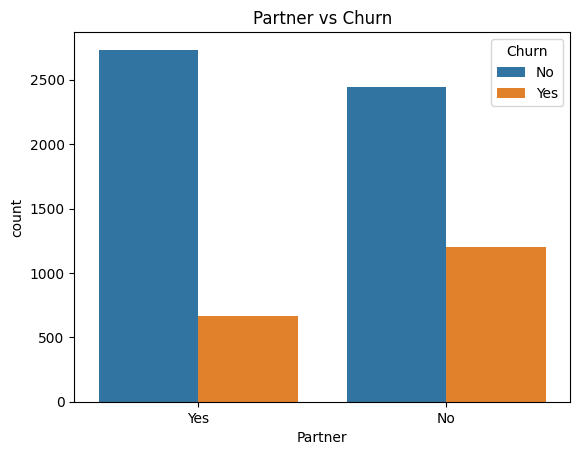

In [13]:
sns.countplot(x="Partner", hue="Churn", data=df)
plt.title("Partner vs Churn")
plt.show()


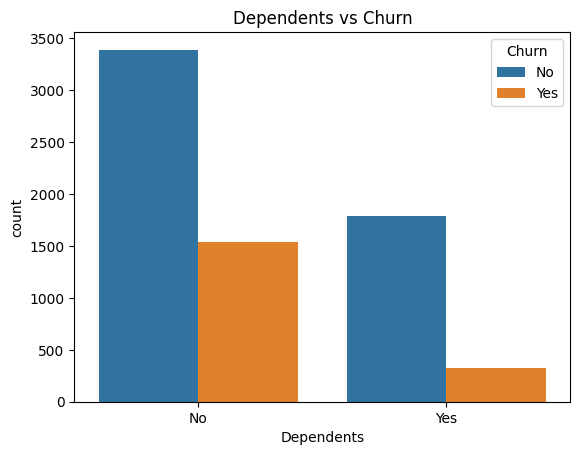

In [14]:
sns.countplot(x="Dependents", hue="Churn", data=df)
plt.title("Dependents vs Churn")
plt.show()


In [16]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].isnull().sum()



np.int64(11)

In [17]:
df.groupby("Churn")[["tenure", "MonthlyCharges", "TotalCharges"]].mean()


,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.569965,61.265124,2555.344141
Yes,17.979133,74.441332,1531.796094
